In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv.
* Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter).
* Dự đoán giá các căn nhà có diện tích 50, 100, 150.

3. Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [6]:
# ----- 2 ------
# Read the dataset 
house_price_df = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv")
house_price_df.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [7]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diện tích  30 non-null     float64
 1   Giá        30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
house_price_df.describe()

,Diện tích,Giá
count,30.000000,30.000000
mean,65.000000,981.656633
std,21.249598,323.623977
min,30.000000,448.524000
25%,47.500025,713.262250
50%,65.000000,973.896000
75%,82.499975,1248.992500
max,100.000000,1515.280000


In [42]:
# Get only values of the df
data = house_price_df.values
data

array([[  30.    ,  448.524 ],
       [  32.4138,  509.248 ],
       [  34.8276,  535.104 ],
       [  37.2414,  551.432 ],
       [  39.6552,  623.418 ],
       [  42.069 ,  625.992 ],
       [  44.4828,  655.248 ],
       [  46.8966,  701.377 ],
       [  49.3103,  748.918 ],
       [  51.7241,  757.881 ],
       [  54.1379,  831.004 ],
       [  56.5517,  855.409 ],
       [  58.9655,  866.707 ],
       [  61.3793,  902.545 ],
       [  63.7931,  952.261 ],
       [  66.2069,  995.531 ],
       [  68.6207, 1069.78  ],
       [  71.0345, 1074.42  ],
       [  73.4483, 1103.88  ],
       [  75.8621, 1138.69  ],
       [  78.2759, 1153.13  ],
       [  80.6897, 1240.27  ],
       [  83.1034, 1251.9   ],
       [  85.5172, 1287.97  ],
       [  87.931 , 1320.47  ],
       [  90.3448, 1374.92  ],
       [  92.7586, 1410.16  ],
       [  95.1724, 1469.69  ],
       [  97.5862, 1478.54  ],
       [ 100.    , 1515.28  ]])

In [43]:
N = house_price_df.shape[0] # number of observations 
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

Text(0, 0.5, 'price')

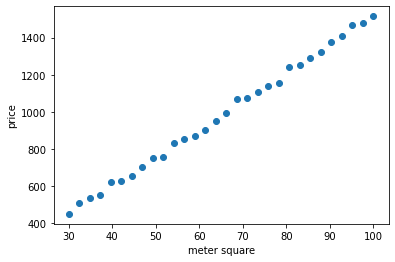

In [44]:
plt.scatter(x, y)
plt.xlabel('meter square')
plt.ylabel('price')

In [81]:
class LinearRegression:
    def __init__(self, data, y_train):
        self.data = data
        self.y_train = y_train
        
    def coefficient(self):
        # matrix form of y_train
        target = np.array(self.data[self.y_train]).reshape(self.data.shape[0], 1) 
        # matrix form of x
        features = np.array(self.data.loc[:,self.data.columns != self.y_train]).reshape(self.data.shape[0], self.data.shape[1]-1)
        # adding column of ones to x
        x = np.concatenate((np.ones((self.data.shape[0],1)), features), axis = 1) 
        # w = (x^Tx)^-1 x^T y
        w = np.array(np.linalg.inv(x.T.dot(x)).dot(x.T).dot(target)).reshape(features.shape[1] + 1, 1)
        return w
    
    def add_predict_column(self):
        data1 = self.data.copy()
        features = np.array(self.data.loc[:, self.data.columns != self.y_train]).reshape(self.data.shape[0],self.data.shape[1]-1)
        w = self.coefficient()
        data1['Dự đoán'] = features.dot(w[1:,]) + w[0]
        return data1
    
    def mse(self): 
        data1 = self.add_predict_column()
        return round(float(np.mean((data1['predict'] - data1[self.y_train]) ** 2)),5)
    
    def predict_value(self, l):
        array = np.array(l).reshape(1, len(l)) # list of feature
        w = self.coefficient()
        return array.dot(w[1:,]) + w[0]
    
    def model(self):
        w = self.coefficient()
        print('y = ', end = '')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),3), self.data.columns[i-1], '+', end = ' ')
        print(round(float(w[0][0]),3))

In [82]:
house_price_model = LinearRegression(house_price_df, "Giá")

In [103]:
house_price_model.coefficient()

array([[-7.06426865],
       [15.2110908 ]])

In [83]:
house_price_model.model()

y = 15.211 Diện tích + -7.064


In [84]:
house_price_model.predict_value([50])

array([[753.49027134]])

In [85]:
house_price_model.predict_value([100])

array([[1514.04481132]])

In [86]:
house_price_model.predict_value([150])

array([[2274.59935131]])

In [87]:
house_price_updated = house_price_model.add_predict_column()
house_price_updated

,Diện tích,Giá,Dự đoán
0,30.0000,448.524,449.268455
1,32.4138,509.248,485.984986
2,34.8276,535.104,522.701517
3,37.2414,551.432,559.418048
4,39.6552,623.418,596.134579
5,42.0690,625.992,632.851110
6,44.4828,655.248,669.567641
7,46.8966,701.377,706.284172
8,49.3103,748.918,742.999182
9,51.7241,757.881,779.715713


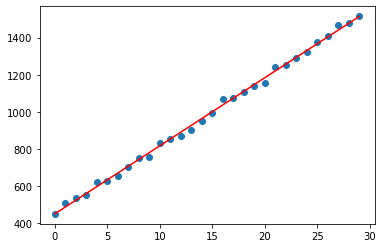

In [88]:
plt.scatter(house_price_updated.index, house_price_updated["Giá"])
plt.plot(house_price_updated['Dự đoán'], 'red')

In [92]:
# ----- 3 ------
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

house_boston_df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=cols )
house_boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [97]:
house_boston = LinearRegression(house_boston_df, 'ZN')
house_boston.model()

y = 0.257 CRIM + -0.476 ZN + -0.409 INDUS + -1.039 CHAS + 2.771 NOX + -0.114 RM + 6.44 AGE + -0.65 DIS + 0.066 RAD + -2.432 TAX + -0.002 PTRATIO + 0.449 B + 0.489 LSTAT + -9.339


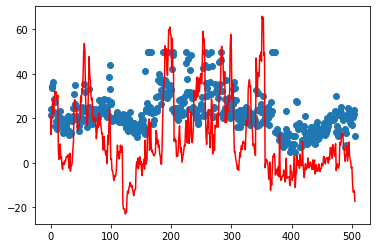

In [98]:
house_boston_predict = house_boston.add_predict_column()
house_boston_predict.reset_index(inplace = True)
plt.scatter(house_boston_predict.index, house_boston_predict.MEDV)
plt.plot(house_boston_predict['Dự đoán'], 'red')